In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
import seaborn as sns

1.Consider the wine dataset

In [3]:
wine=pd.read_csv('D:\datas\winequality.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2.Check if any nulls are present in the dataset

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


3.Perform Outlier Analysis for features and justify reasons if outliers are detected in features.

In [9]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


residual sugar, free sulfur dioxide, total sulfur dioxide has some outliers. lets confirm it using the box plot

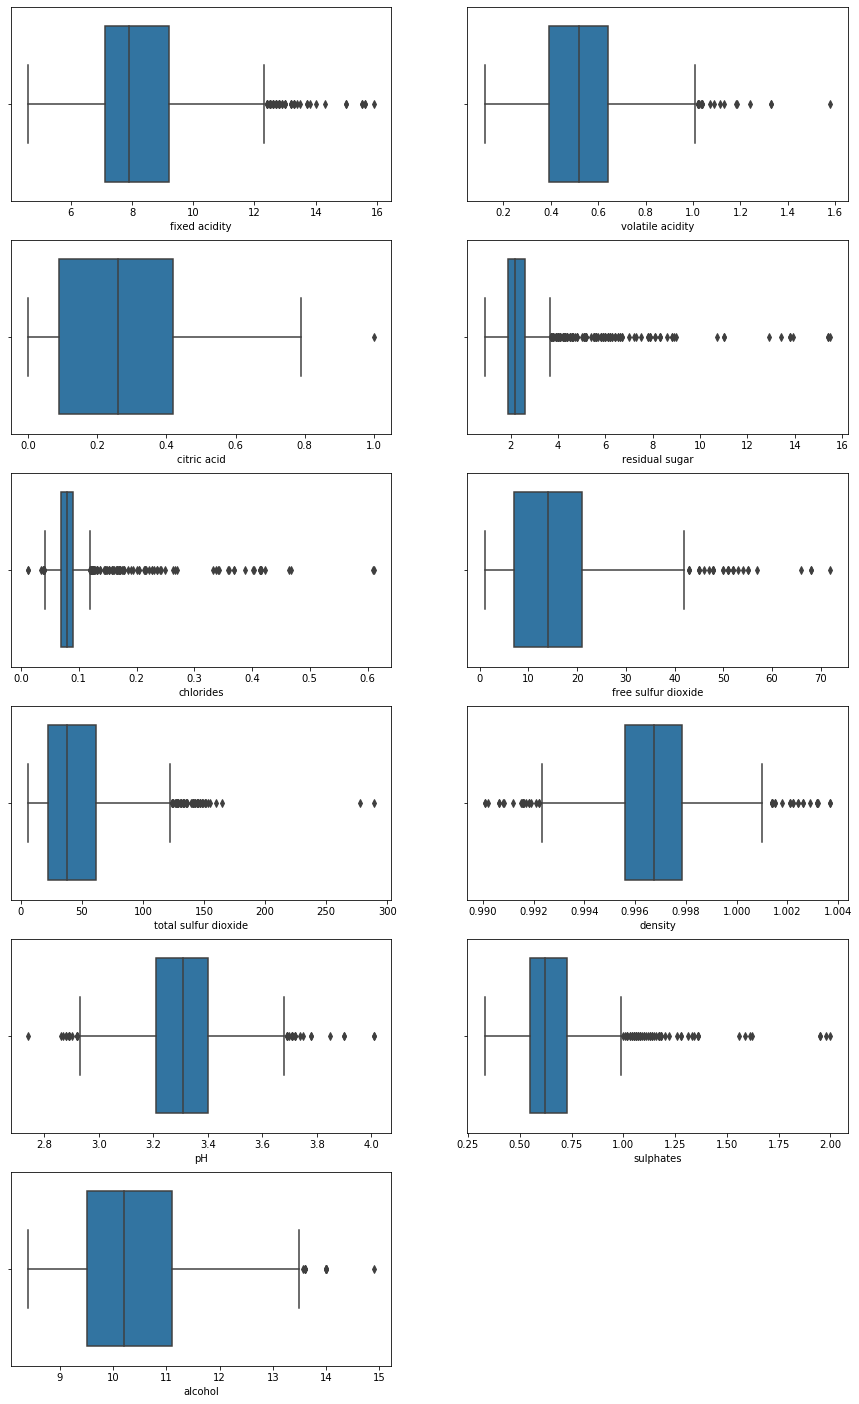

In [16]:
plt.figure(figsize=(15,25))
n=1
num_cols=[]
for col in wine.select_dtypes('float64'):
    plt.subplot(6,2,n)
    sns.boxplot(wine[col])
    #plt.title(col)
    num_cols.append(col)
    n=n+1
plt.show()

    

We can see taht chlorides, free sulpherdioxide and total sulfer di-odixe show outliers the rest of the variable we can see as a business outliers lets start treating the outliers of these 3 variables

In [ ]:
wine['chlorides']=wine.chlorides(wine['chlorides'].values

4.Perform Univariate Analysis of numerical features

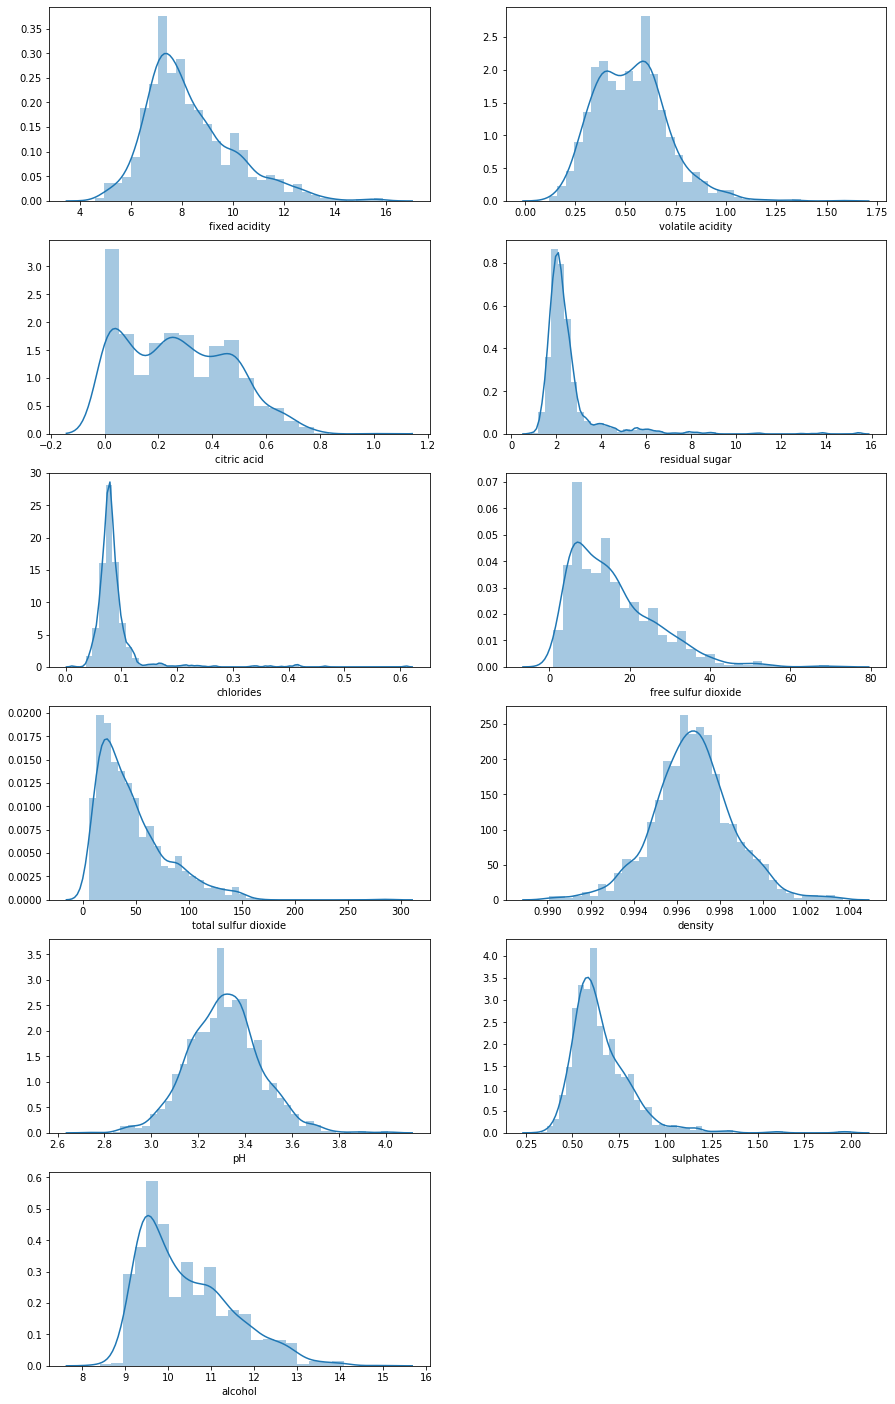

In [18]:
plt.figure(figsize=(15,25))
n=1
for col in wine.select_dtypes('float64'):
    plt.subplot(6,2,n)
    sns.distplot(wine[col])
    #plt.title(col)
    n=n+1
plt.show()
    

In [20]:
size=[wine.quality[wine['quality']==3].count(),wine.quality[wine['quality']==4].count(),wine.quality[wine['quality']==5].count(),wine.quality[wine['quality']==6].count(),wine.quality[wine['quality']==7].count(),wine.quality[wine['quality']==8].count()]

In [21]:
labels=['quality-3', 'quality-4', 'quality-5', 'quality-6', 'quality-7', 'quality-8']

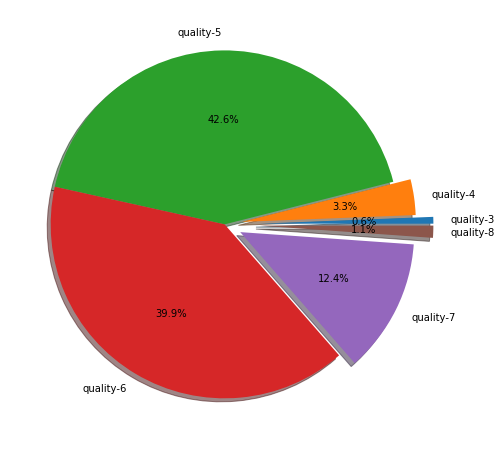

In [28]:
plt.figure(figsize=(8,8))
plt.pie(size, labels=labels, explode=(0.2,0.1,0,0,0.1,0.2), shadow=True, autopct='%1.1f%%')
plt.show()

5. Perform bi-variate analysis of 2-3 features

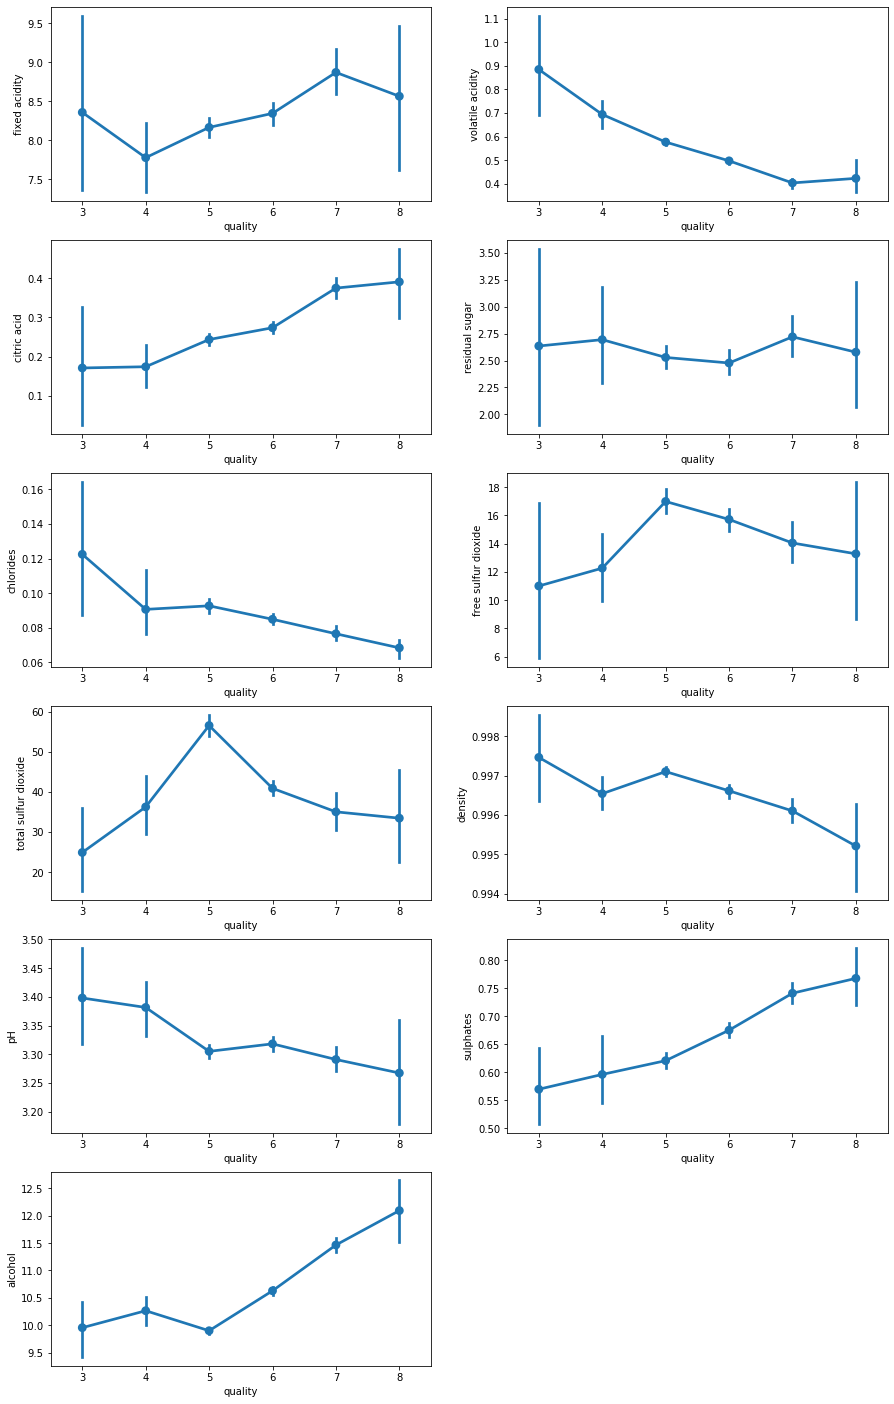

In [29]:
plt.figure(figsize=(15,25))
n=1
for col in wine.select_dtypes('float64'):
    plt.subplot(6,2,n)
    sns.pointplot(x='quality', y=col, data=wine)
    #plt.title(col)
    n=n+1
plt.show()

6.Normalize features using MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler=MinMaxScaler()

In [40]:
nums=wine.loc[:,num_cols]
numeric=scaler.fit_transform(nums)
x=pd.DataFrame(numeric, columns=num_cols)

In [41]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
